# Module 14 - Support Vector Machines 

## Module Overview
Support Vector Machines (SVMs) are powerful machine learning models used for classification and regression tasks. They work by finding an optimal hyperplane that best separates different classes of data. This module explores the fundamental principles of SVMs, including margin maximisation, kernel methods, and handling outliers with soft-margin classifiers. Additionally, it covers multi-class classification approaches and real-world applications in areas such as image recognition and text classification.

## Learning outcomes

- LO 1: Describe how support vector machines (SVM) separate data using maximum margin hyperplanes.
- LO 2: Identify popular kernel lifting classes, explain the implications of different error rates between them and select a kernel type appropriate to a given project.
- LO 3: Explain why soft-margin classifiers are better-suited for handling data with outliers.
- LO 4: Describe how SVMs can be applied to classification problems with more than two outcomes.
- LO 5: Apply SVMs to a high-dimensional machine learning problem.
- LO 6: Refine a codebase for machine learning competitions.

## Misc and Keywords
- **Auxiliary variables** are additional variables introduced into a model to help capture or represent relationships between existing variables in a more useful or insightful way. They are not directly part of the original problem or data but are created or derived from the original variables to improve the model's ability to explain or predict outcomes.

## Support Vector Machines

SVM (Support Vector Machine) are used to classify data by drawing a hyperplane to separate two different groups of things.

Sometimes, the relationship between the input (what we know) and the output (what we want to predict or classify) isn't a straight line. For example, imagine trying to classify apples and oranges. Their features (like weight, size, color) might not always follow a simple straight line rule.

So SVMs used the **"kernel trick"**. Instead of trying to draw a straight line or flat hyperplane (which works for simple cases), the kernel trick helps by "transforming" the data into a new space where the relationship is easier to separate. It's like you’re taking the data, stretching it, or changing the coordinates in such a way that it becomes easier to draw that line (or hyperplane) in the new space.

When the data is more complex (non-linear), we can't just draw a straight line. But by using the kernel trick, we can move the data into a new space where a line or hyperplane can be drawn in that space, which helps in making better decisions.

**Soft-margin SVMs** can be used for outliers which enables the incorrect classifiction of samples, but at the cost of a penalty.

SVMs can be adapated to general classification problems.

SVMs have multiple classes:
- Hard-margin SVMs
- Soft-margin SVMs

### Hard-margin SVMs

When trying to separate data points into different classes (e.g., apples vs. oranges), there could be many ways to draw a line (or hyperplane, in higher dimensions) that separates the two groups. But the question is: Which line should we choose? This can be determined by **measurement errors** or **classification margin**

1. **Measurment Errors**: The line is chosen that would still hold true even when noise is present in points. The black line in the image is the optimal choice as it allows all points to have noise and at a decent sized margin. Thus you choose the separator that is most robust to these measurements of error. 

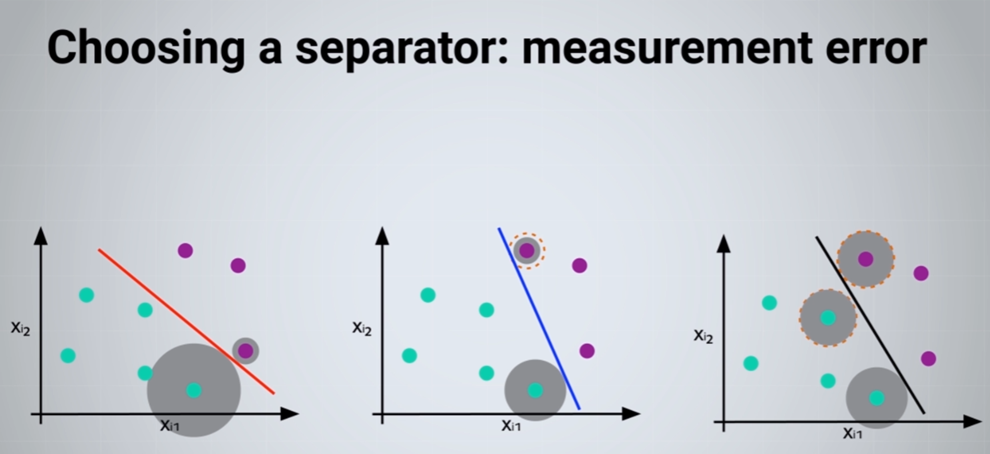

2. **Classification Margin**: We select the line (or hyperplane) that has the largest margin. Another way of thinking about this is the one that can have the most padding on both sides without touching the point. See the image below:

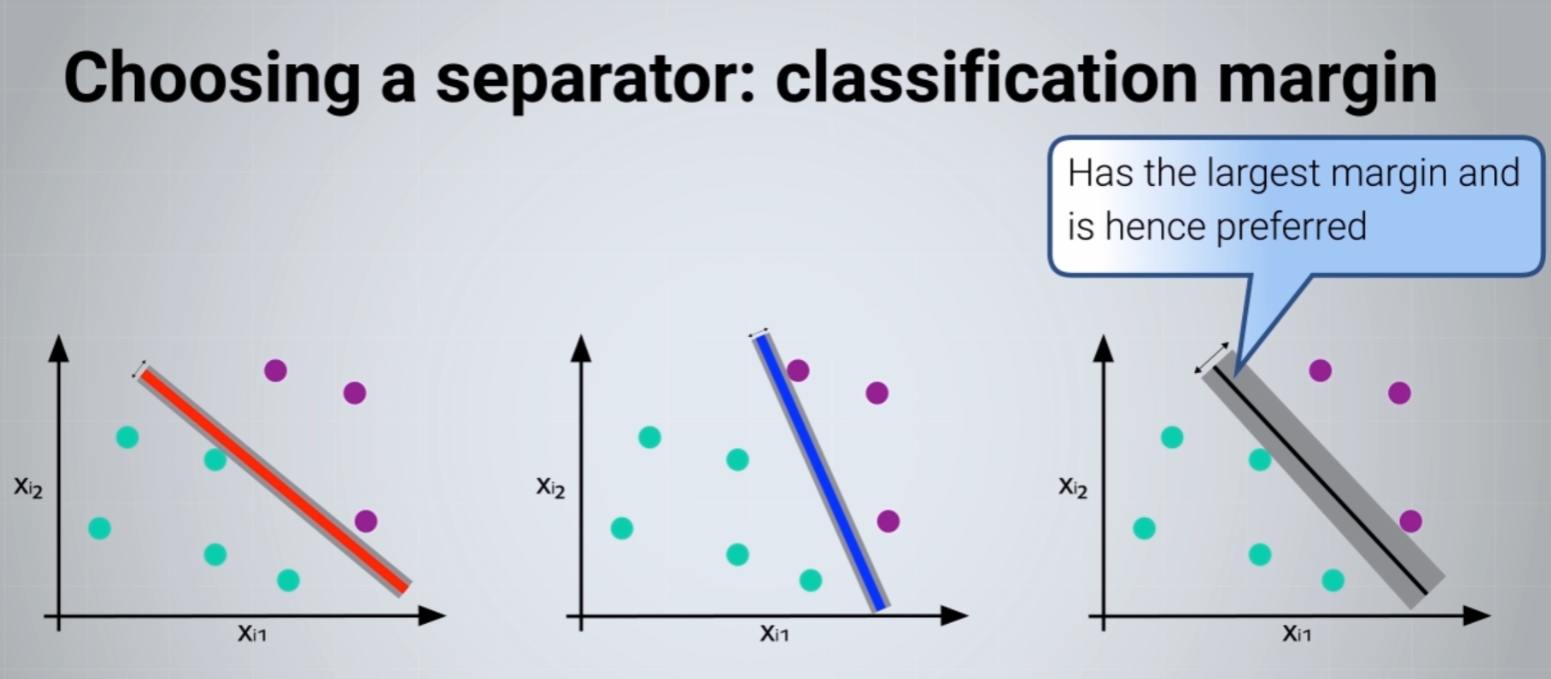

The goal in a **Hard-margin SVM** is to maximize this margin. Why? Because a larger margin tends to make the classifier more confident and robust — it means the line is further away from the points, so it’s less likely to misclassify data if things get slightly noisy or new data is introduced.

The support vectors are the critical data points that determine where the hyperplane (separator) should be. These are the points that lie closest to the separating hyperplane. The reason they’re important is that if you moved these points, the position of the hyperplane would change, so they essentially "support" the optimal hyperplane.

It can be difficult to find the optimal seporator with so many potentials, so we can formularte an optimisation problem known as a quadratic program. This aims to maximise the margain whilst also correctly identifying all of the datapoints.

In practice, Hard-margin SVMs work well when the data is perfectly separable. If the data isn't perfectly separable or if it has noise,  use Soft-margin SVMs, which allow some errors to be made while still trying to keep a large margin.

**Shortcomings**: They typically fail with outliers and non-linear relationships and therefore aren't always the best choice. When this happens the quadratic seperator function becomes unfeasbile and we do not get a solution at all

There are two ways to deal with outliers and non-linearties this are; **Lifting via Kernel Trick** or **Soft-margin SVMs**

### The Kernel Trick

Introduce additional auxiliary variables to turn a non-linear relationship between an input and output variable into a linear relationship

The image below shows the very simple idea of 'lifting' in which an additional variable $X_3$ is introduced which performs a calculation of the distance of points to the mean, as expected, the ring in the center has a closer distance so they are easily separated.

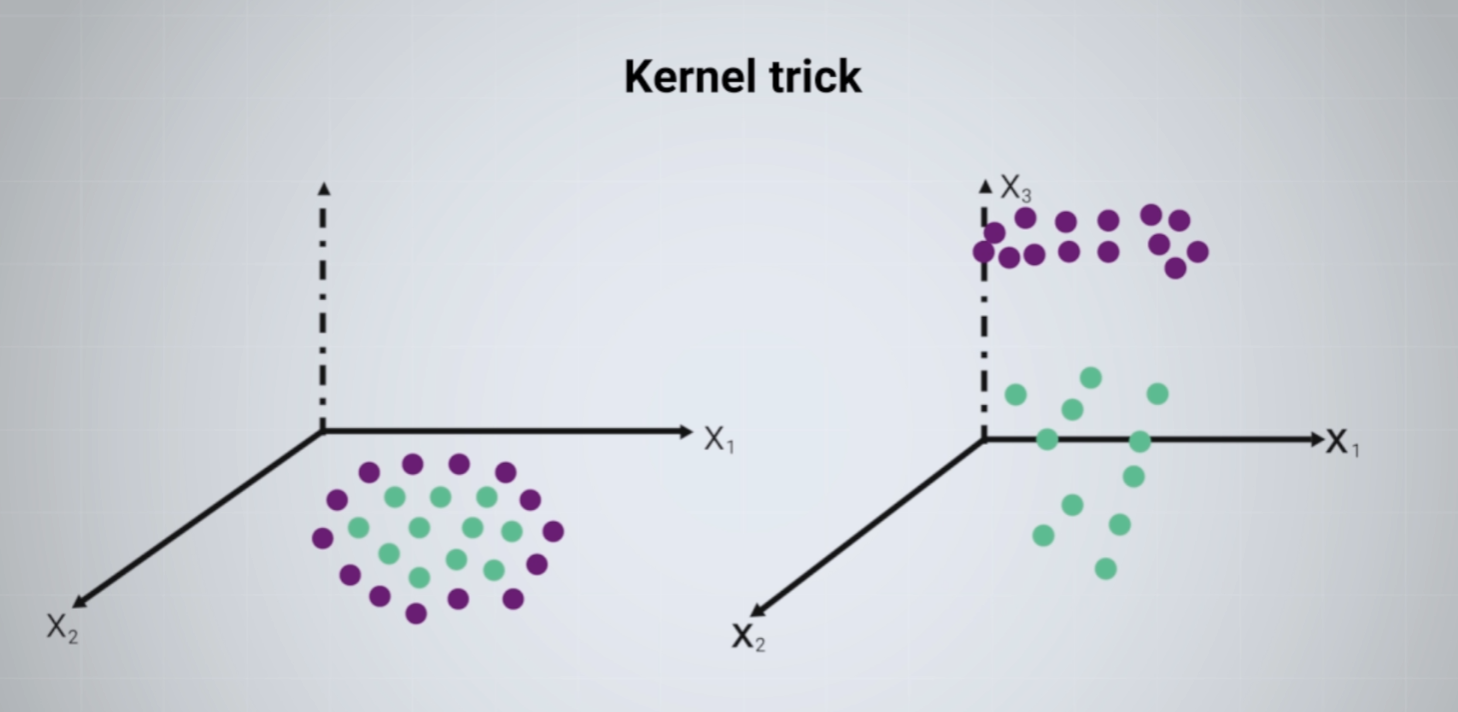

In higher dimensional data this becomes much more difficult. There are a variety of lifting classes that can perform this:

- Polynomial Kernels: Introduce powers and products of the original input features, enabling the model to capture non-linear relationships by creating interactions between features (e.g., x^2, xy, y^2).
- Gaussian RBF Kernels: Implicitly map data into an infinite-dimensional space by considering the distance between data points, allowing for complex, non-linear decision boundaries. It introduces an infinite number of auxiliary variables.
- Laplace RBF Kernels: Similar to the Gaussian RBF kernel, but uses a different distance metric (the Laplace distribution) to calculate similarity, which impacts the width of the decision boundary.
- Sigmoid Kernels: Based on the hyperbolic tangent function (tanh), they transform the data using a non-linear function, making it suitable for certain types of classification problems.
- Hyperbolic Tangent Kernels: Use a similar transformation to the sigmoid kernel, relying on the tanh function to capture more complex, non-linear relationships between the input features.

Can determine which one to use via testing multiple ones, or using cross validation.

You do not want to use The Kernel Trick for outliers as it can result in complicated seperators that seperate the outlier from the data, but do not perform well on remaining data or unseen data. This is as they just learnt the 'noise' in the training data set. Soft-margin SVMs overcome this

### Soft-Margin SVMs

Soft-margin SVMs allow some of the points to be incorrectly classified and aim to minimise the misclassific rate, whilst trying to maximise the margin classification. 

This is a multi-objective optimisation problem that can be reformulated as a qudratic program and solved efficiently.

Soft-margin can also be combined with the Kernel Trick to address both the issue of outliers and the presence of non-linerarities.

### SVMs for Multiple Classes

Two ways to deal with multiple classes; One-vs-One classification, or One-vs-All classifcation

**One-vs-One**
- One SVM is constructured for each pair of potential output values.
    - i.e., if there are four possible output variable values we would construct 6 different SVMs
- Each of the SVMs decides for a given pair of output variable values, which of these values is more likely to be the true ouput value for the new sample at hand.
- The output value is then the one that has been predicted by the most SVMs
- Simply put, it works like a tournament. Each candidate plays against each other, and the one with the most wins, is selected.

**One-vs-All**
- One SVM for each output
    - i.e., if there are four possible output variable values we would construct 4 different SVMs. 
- Each of the SVMs decides whether the new sample at hand should have that particular output variable value, or any of the other output variable values.
- The output variable value is the value where the associated SVM is most confident that it has correctly classified this as the particular value.


### Examples of Organisational Applications

They are extremely popular in classification tasks that related to images. SVMs are quite often used to automatically label images
They are used in face detection and in trying to recognise people or emotions on faces
They can be used in hand writing recognition 

Why are SVMs so popular for images? Kernels allow SVMs to learn complicated relationships not just between individual pixels of the image but also between larger clusters of pixels i.e. those that form edges, contours, or even facial expressions.

They are also used in 
- text classification i.e. categorising news articles
- bioinformatics such as tissue classification, protein fold prediction

